# Email_Spam_Detection

In [1]:
import warnings
warnings.filterwarnings('ignore')

importing the neccesary libraries needed for the task

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#checkingthe shape of the dataset
dataset.shape

(5572, 5)

In [5]:
#checking the size of the dataset
dataset.size

27860

## Data Cleaning

In [6]:
#showing information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#describing the dataset
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
#we don't need columns like Unnamed: 2	,Unnamed: 3,Unnamed: 4 so we are droping them
dataset.drop(columns=["Unnamed: 4","Unnamed: 2","Unnamed: 3"],inplace=True)
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# renaming the columns
dataset.rename(columns={'v1':'Message_Type','v2':'Message'},inplace=True)
dataset.head()

,Message_Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# checking missing values
dataset.isnull().sum()

Message_Type    0
Message         0
dtype: int64

There is no misssing values present in it

In [11]:
#checking any duplicated in the dataset
dataset.duplicated().sum()

403

In [12]:
# Removing duplicates
dataset=dataset.drop_duplicates(keep='first')
dataset.duplicated().sum()

0

In [13]:
dataset.shape

(5169, 2)

The shape of the dataset has been after removing the duplicates

## Data Encoding

In [14]:
lab=LabelEncoder()
dataset['Message_Type']=lab.fit_transform(dataset['Message_Type'])
dataset.head()

,Message_Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


we done with label encoding where ham=0,spam=1

## Data Analysis

In [15]:
#checking the ham and spam messages
dataset['Message_Type'].value_counts()

Message_Type
0    4516
1     653
Name: count, dtype: int64

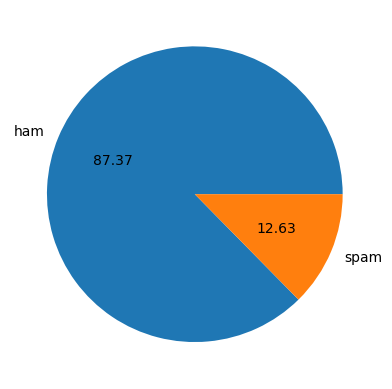

In [16]:
#Visualizing using piechart
plt.pie(dataset['Message_Type'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [17]:
# finding no.of charcters in sms/email
dataset['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Message, Length: 5169, dtype: int64

In [18]:
# adding new column as Message_Count to the dataset
dataset['Character_Count']=dataset['Message'].apply(len)
dataset.head()

,Message_Type,Message,Character_Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# Fetcing the words in the message
dataset['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [20]:
#counting the words in the message
dataset['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Message, Length: 5169, dtype: int64

In [21]:
#creating new column for the word_count in the message
dataset['Word_Count']= dataset['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
dataset.head()

,Message_Type,Message,Character_Count,Word_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
# finding sentences in the message
dataset['Message'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Message, Length: 5169, dtype: object

In [23]:
# finding no.of sentences in the message
dataset['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Message, Length: 5169, dtype: int64

In [24]:
dataset['sentence_count']=dataset['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
dataset.head()

,Message_Type,Message,Character_Count,Word_Count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
#describing the dataset
dataset.describe()

,Message_Type,Character_Count,Word_Count,sentence_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


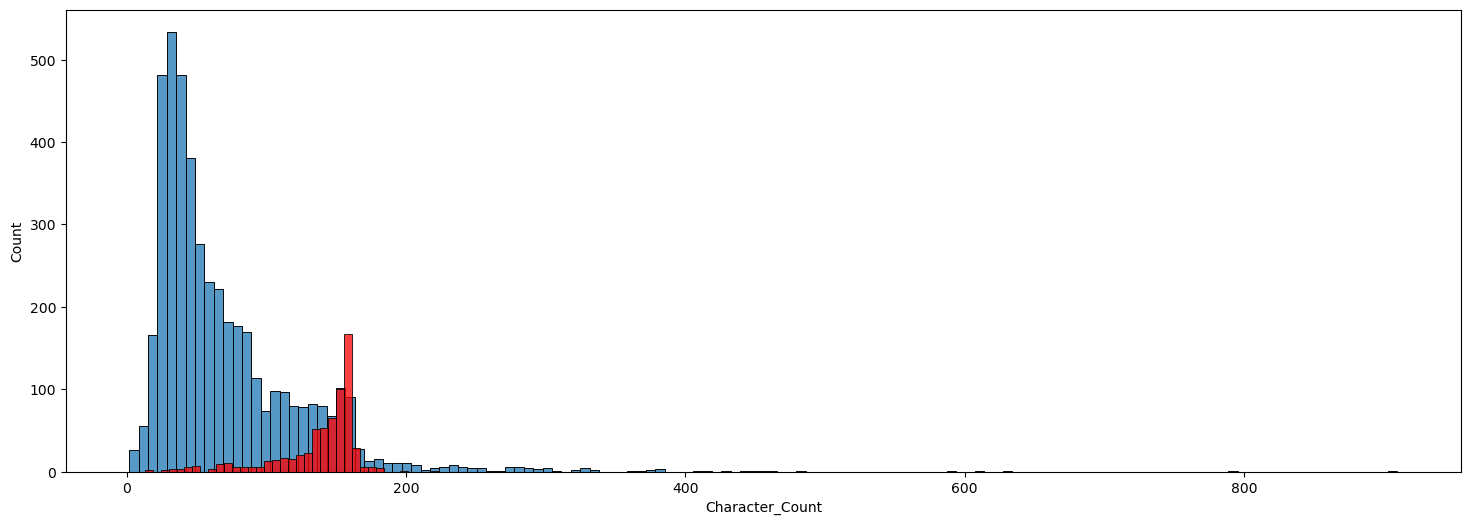

In [26]:
#Visualizing the num of characters in message by separatly ham and spam
plt.figure(figsize=(18,6))
sns.histplot(dataset[dataset['Message_Type']==0]['Character_Count']) #ham
sns.histplot(dataset[dataset['Message_Type']==1]['Character_Count'],color='red') #spam
plt.show()

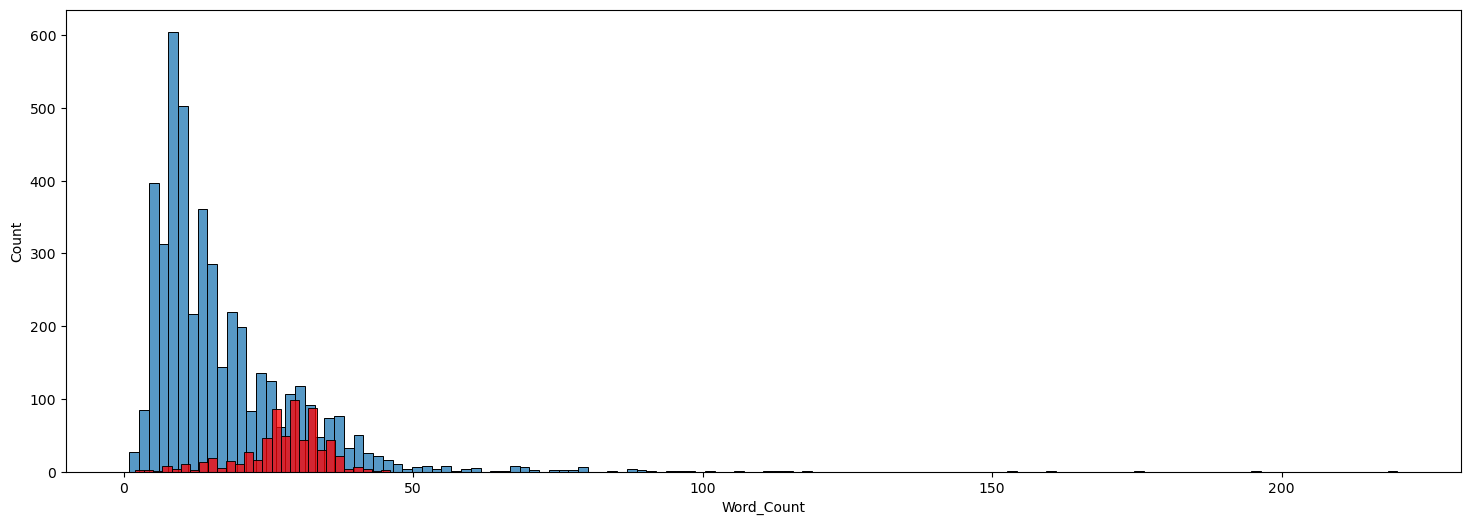

In [27]:
#Visualizing the num of words in message by separatly ham and spam
plt.figure(figsize=(18,6))
sns.histplot(dataset[dataset['Message_Type']==0]['Word_Count']) #ham
sns.histplot(dataset[dataset['Message_Type']==1]['Word_Count'],color='red') #spam
plt.show()

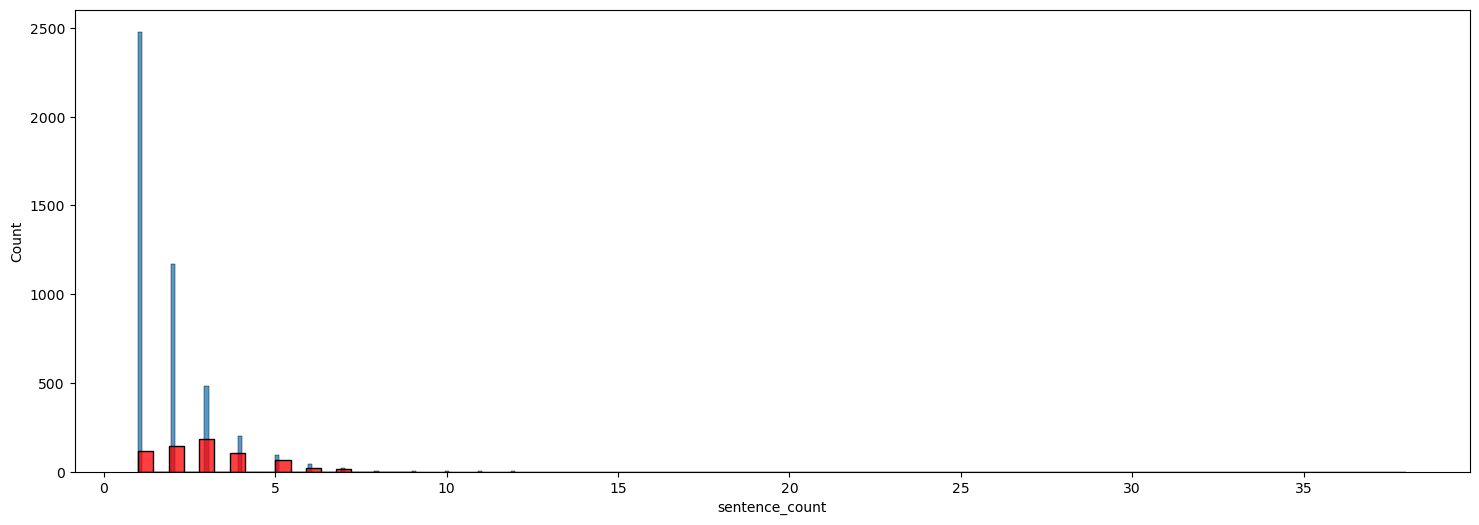

In [28]:
#Visualizing the num of sentences in message by separatly ham and spam
plt.figure(figsize=(18,6))
sns.histplot(dataset[dataset['Message_Type']==0]['sentence_count']) #ham
sns.histplot(dataset[dataset['Message_Type']==1]['sentence_count'],color='red') #spam
plt.show()

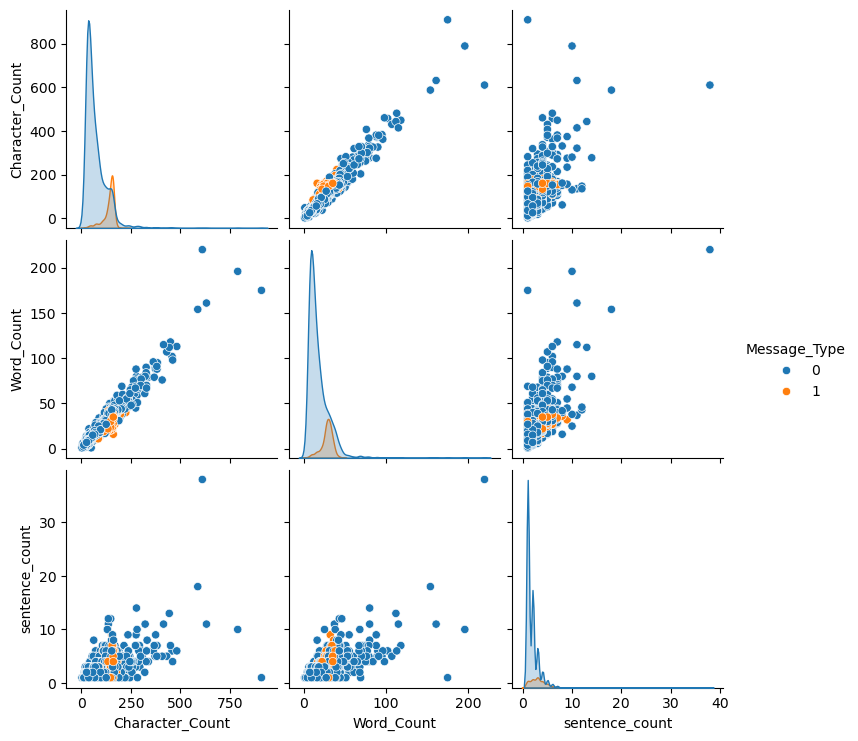

In [29]:
#visualizing the dataset using pair plot
sns.pairplot(dataset,hue='Message_Type')

## Data Preprocessing

In [30]:
dataset

,Message_Type,Message,Character_Count,Word_Count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [31]:
# converting lowercase example
def transform_text1(text1):
    text1=text1.lower()
    return text1
transform_text1('HI Hello How aRe YoU')

'hi hello how are you'

In [32]:
# Tokenization example
def transform_text2(text2):
    text2=nltk.word_tokenize(text2)
    return text2
transform_text2('HI Hello How aRe YoU')

['HI', 'Hello', 'How', 'aRe', 'YoU']

In [33]:
# Removing special characters Example
def transform_text3(text3):
    y=[]
    for i in text3:
        if i.isalnum():
            y.append(i)
    return y
print(transform_text3('HI Hello @How % #29 aRe YoU ?'),end='')

['H', 'I', 'H', 'e', 'l', 'l', 'o', 'H', 'o', 'w', '2', '9', 'a', 'R', 'e', 'Y', 'o', 'U']

In [34]:
# Removing stop words and punctuation
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
#checking the specific message
dataset.Message.iloc[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [36]:
#example for stemmer how stemmer works
stemmer=PorterStemmer()
stemmer.stem('running')

'run'

In [37]:
#coverting the message into lower case,removing punctuation and stemming the words
stemmer=PorterStemmer()
corpus=[]

stopwords_set=set(stopwords.words('english'))

for i in range(len(dataset)):
    text=dataset['Message'].iloc[i].lower()
    text=text.translate(str.maketrans('','',string.punctuation)).split()
    text=[stemmer.stem(word) for word in text if word not in stopwords_set]
    text=' '.join(text)
    corpus.append(text)

In [38]:
#original message 
dataset.Message.iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
#this is the after removing the punctuation,coverting into lower case and using stemming
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## Model Building

In [40]:
vectorizer=CountVectorizer()

X=vectorizer.fit_transform(corpus).toarray()
Y=dataset.Message_Type

here x is the features,y is the target

In [41]:
#separated x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [42]:
#Showig the shaes of the x_train,x_test,y_train,y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4135, 8038)
(4135,)
(1034, 8038)
(1034,)


In [43]:
#using random forest 
clf=RandomForestClassifier(n_jobs=-1)

clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [44]:
#testing the score for that
clf.score(x_test,y_test)

0.9758220502901354

Here we got the 97% of accuracy to finding the mail is spam or ham 

In [45]:
#classifying the email
email_to_classify=dataset.Message.values[12]
email_to_classify

'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [46]:
#prepocesssing the data of email
email_text=email_to_classify.lower().translate(str.maketrans('','',string.punctuation)).split()
email_text=[stemmer.stem(word) for word in text if word not in stopwords_set]
email_text=' '.join(email_text)

email_corpus=[email_text]


In [47]:
#here we  are transforming the already fitted data
X_email=vectorizer.transform(email_corpus)

In [48]:
clf.predict(X_email)

array([0])

In [49]:
dataset.Message_Type.iloc[2]

1

Here it was showing the message is spam where 0-ham,1-spam